## The goal of this analysis was to explore Amazon sales data in order to identify sales patterns,cancellation trends, and fulfillment performance.

# 📊 Dataset Description – Amazon Sales Report
This dataset represents Amazon sales transactions, containing information about orders, fulfillment, shipping, products, and financial details. Each row corresponds to a single order line item.

🔑 Columns Explanation

Order ID → Unique identifier for each order.

Date → Date when the order was placed.

Status → Current order status (e.g., Shipped, Pending, Canceled).

Fulfilment → How the order is fulfilled (Merchant, Amazon).

Sales Channel → The channel through which the order was placed (e.g., Amazon.in, Amazon.com).

ship-service-level → Type of shipping selected (e.g., Standard, Expedited, Priority).

Style / Size / Category → Product attributes (style, size, category).

SKU (Stock Keeping Unit) → Seller-defined identifier to track inventory.

ASIN (Amazon Standard Identification Number) → Amazon’s global product identifier (unique across marketplace).

Courier Status → Shipping progress (e.g., Shipped, In Transit, Delivered, Not yet shipped).

Qty → Number of units ordered.

Currency → Currency used for the transaction.

Amount → Transaction amount (order value).

ship-city / ship-state / ship-postal-code / ship-country → Customer delivery details.

promotion-ids → ID of any applied promotions or discounts.

B2B → Indicates if the order is Business-to-Business.

fulfilled-by → Whether fulfilled by Amazon or Merchant.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') # Ignoring the warnings that comes before the output

In [4]:
df = pd.read_csv('Amazon Sale Report.csv')
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [5]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [6]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [8]:
df.shape

(128975, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [10]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


# Now we will drop the index and Unnamed column as they don't add a meaning

In [11]:
df.drop(columns=["index", "Unnamed: 22"], inplace=True) # we don't need the index or the Unnamed column

# We will convert the Data column from string to datetime so we can work with it

In [12]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  

df["ship-postal-code"] = df["ship-postal-code"].astype("Int64").astype("string")
# Convert postal codes to nullable integers first (to handle missing values),
# then to string for consistency.

In [13]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

### 🔹 Data Cleaning Steps

In this section, we handle missing values, remove invalid records, and standardize columns to prepare the dataset for analysis:

1. **Fill missing values**  
   - `fulfilled-by` → set to `"Unknown"`  
   - `promotion-ids` → set to `"No Promotion"`  
   - `Courier Status` → set to `"Unknown"`  
   - `currency` → set to `"INR"`  

2. **Drop rows with critical missing data**  
   - Remove rows where `Amount` is missing.  
   - Remove rows where shipping details (`ship-city`, `ship-state`, `ship-country`) are missing.  

3. **Standardize status values**  
   - `"Shipped - Delivered to Buyer"` → `"Delivered"`  
   - `"Shipped"` → `"Shipped"`  
   - `"Cancelled"` → `"Cancelled"`  

4. **Remove duplicates**  
   - Drop duplicate rows based on `Order ID`.  

5. **Remove invalid values**  
   - Ensure `Amount ≥ 0`.  
   - Ensure `Qty > 0`.  

Finally, we check for any remaining missing values with `df.isnull().sum()`.


In [12]:
df["fulfilled-by"].fillna("Unknown", inplace=True)
df["promotion-ids"].fillna("No Promotion", inplace=True)
df["Courier Status"].fillna("Unknown", inplace=True)
df["currency"].fillna("INR", inplace=True)
df = df.dropna(subset=["Amount"])
df.dropna(subset=["ship-city", "ship-state", "ship-country"], inplace=True)
df["promotion-ids"].fillna("No Promotion", inplace=True)
df["fulfilled-by"].fillna("Unknown", inplace=True)
df["Status"] = df["Status"].replace({
    "Shipped - Delivered to Buyer": "Delivered",
    "Shipped": "Shipped",
    "Cancelled": "Cancelled"
})
df.drop_duplicates(subset=["Order ID"], inplace=True)

# ---------- Remove invalid values ----------
df = df[df["Amount"] >= 0]
df = df[df["Qty"] > 0]
df.isnull().sum()


Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [14]:
print("Total Orders:", df["Order ID"].nunique())
print("Total Sales Revenue:", df["Amount"].sum())
print("Average Order Value (AOV):", df["Amount"].mean())
print("Top 5 Categories:\n", df["Category"].value_counts().head())


Total Orders: 108271
Total Sales Revenue: 70472698.0
Average Order Value (AOV): 650.8917253927644
Top 5 Categories:
 Category
Set              42326
kurta            41181
Western Dress    13185
Top               9303
Ethnic Dress       980
Name: count, dtype: int64


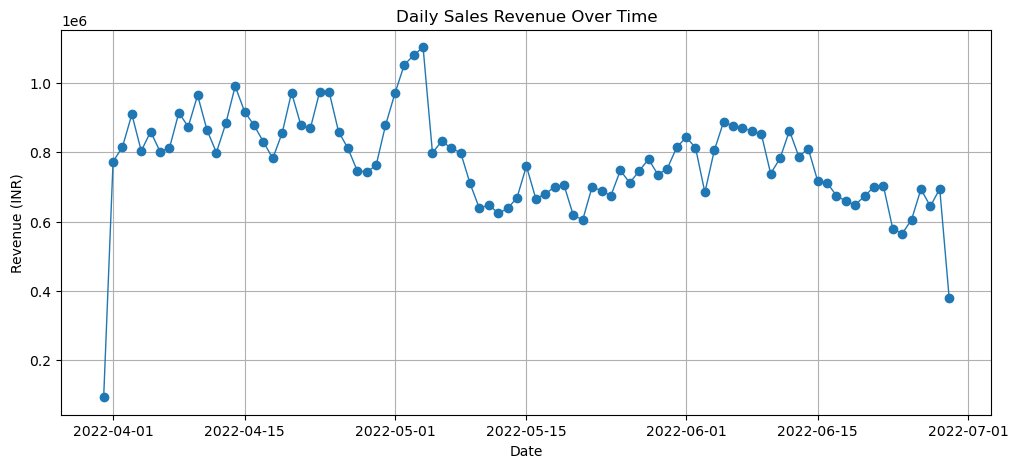

In [23]:

# Group by Date
daily_sales = df.groupby("Date")["Amount"].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linewidth=1)
plt.title("Daily Sales Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (INR)")
plt.grid(True)
plt.show()





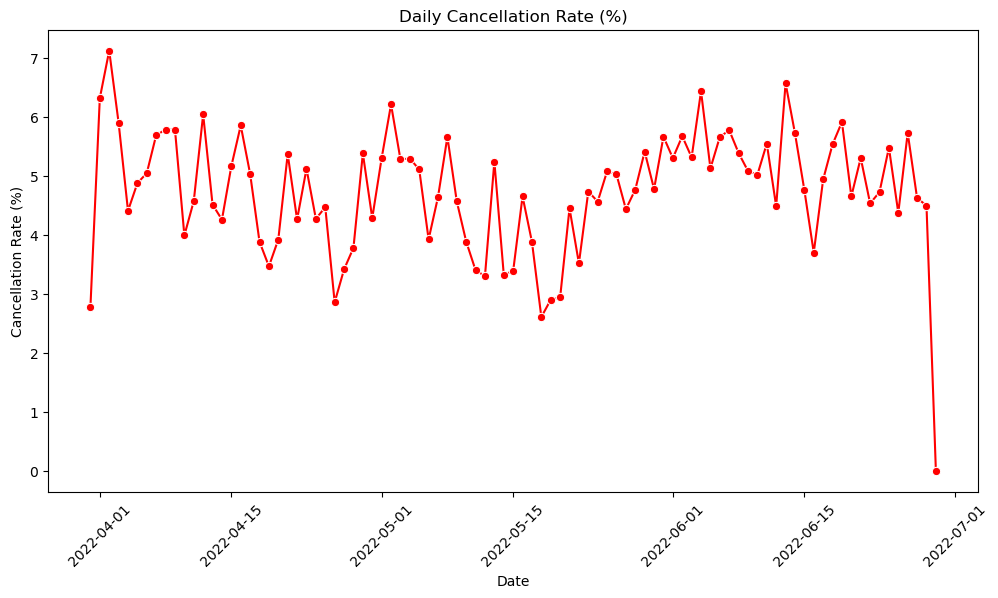

In [24]:
df["is_cancelled"] = df["Status"].apply(lambda x: 1 if "Cancelled" in x else 0)
daily_cancellation = df.groupby(df["Date"])["is_cancelled"].mean() * 100
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_cancellation.index, y=daily_cancellation.values, marker="o", color="red")
plt.title("Daily Cancellation Rate (%)")
plt.xlabel("Date")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.show()


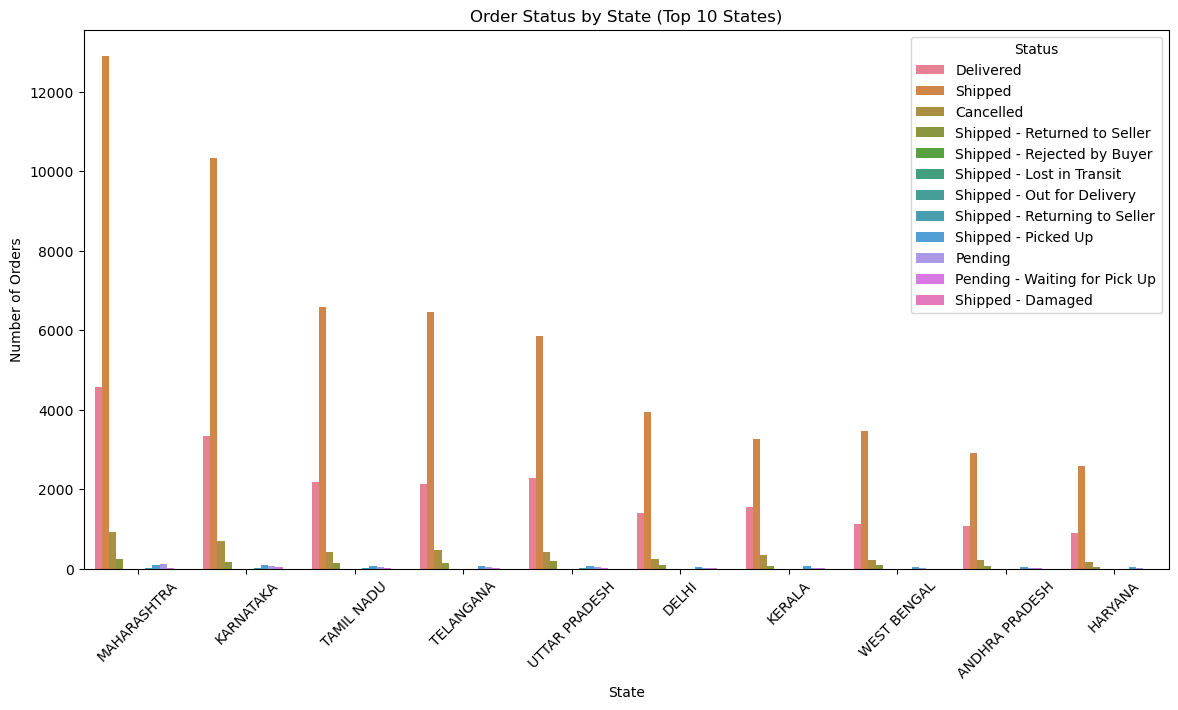

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(
    data=df,
    x="ship-state",
    hue="Status",
    order=df["ship-state"].value_counts().index[:10]  # top 10 states
)
plt.title("Order Status by State (Top 10 States)")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.legend(title="Status")
plt.show()


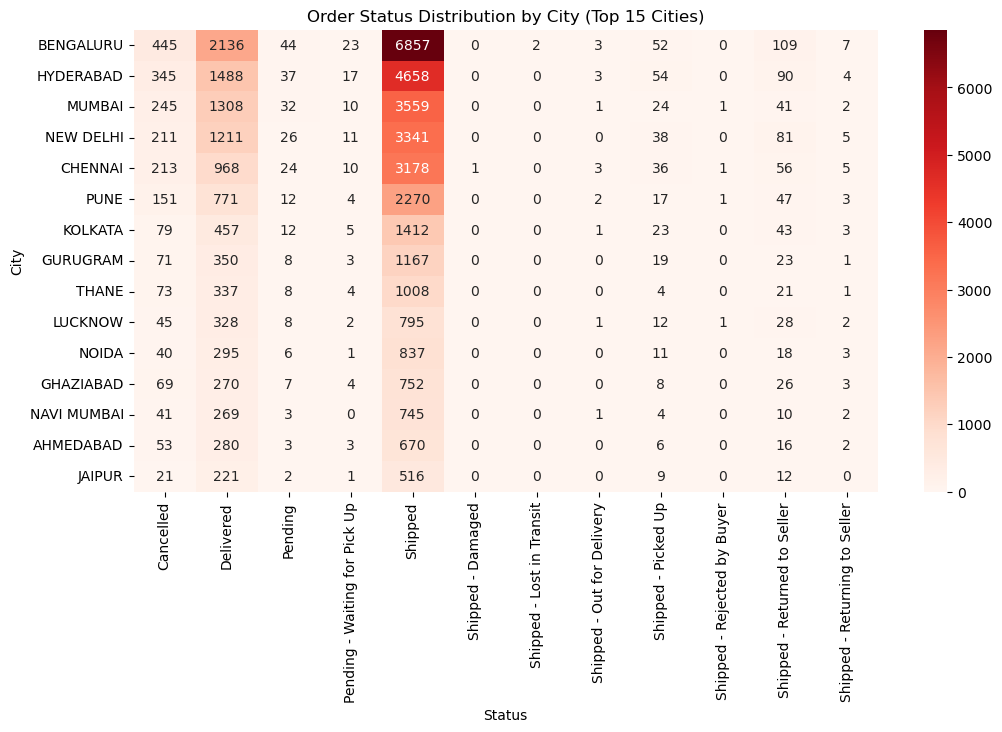

In [26]:
# Crosstab between city and status
city_status = pd.crosstab(df["ship-city"], df["Status"])

# Take top 15 cities
city_status = city_status.loc[city_status.sum(axis=1).sort_values(ascending=False).head(15).index]

plt.figure(figsize=(12,6))
sns.heatmap(city_status, annot=True, fmt="d", cmap="Reds")
plt.title("Order Status Distribution by City (Top 15 Cities)")
plt.ylabel("City")
plt.xlabel("Status")
plt.show()


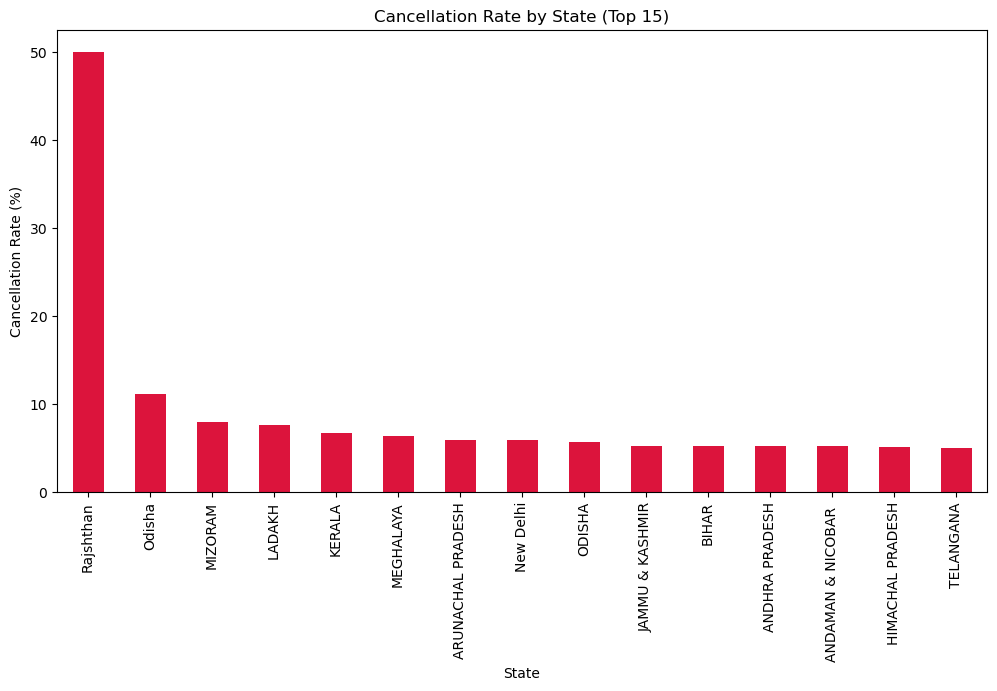

In [27]:
state_cancel_rate = (
    df.groupby("ship-state")["is_cancelled"].mean().sort_values(ascending=False) * 100
)

plt.figure(figsize=(12,6))
state_cancel_rate.head(15).plot(kind="bar", color="crimson")
plt.title("Cancellation Rate by State (Top 15)")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("State")
plt.show()


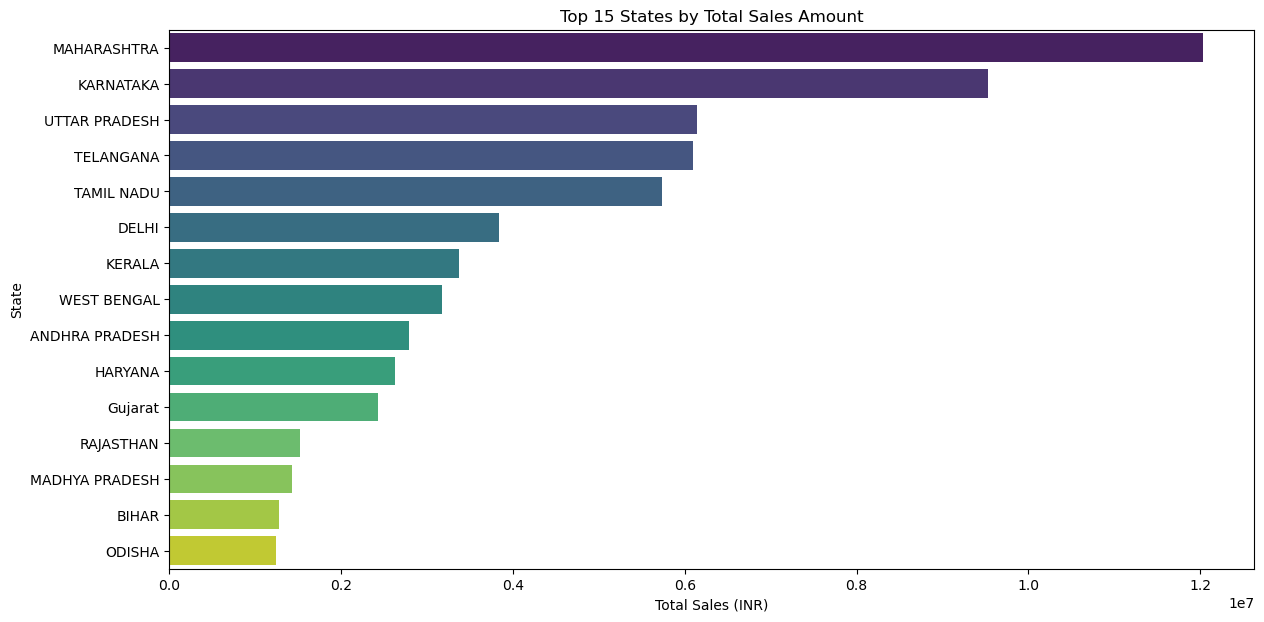

In [28]:
state_sales = df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(
    x=state_sales.head(15).values,
    y=state_sales.head(15).index,
    palette="viridis"
)
plt.title("Top 15 States by Total Sales Amount")
plt.xlabel("Total Sales (INR)")
plt.ylabel("State")
plt.show()


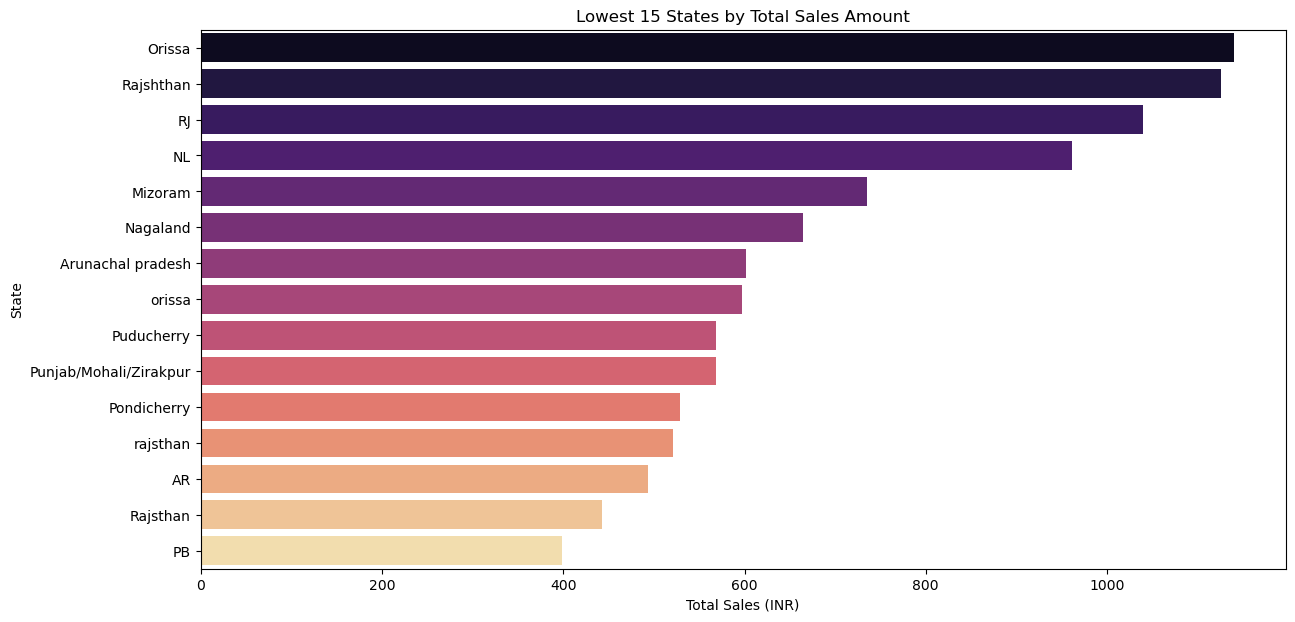

In [29]:
plt.figure(figsize=(14,7))
sns.barplot(
    x=state_sales.tail(15).values,
    y=state_sales.tail(15).index,
    palette="magma"
)
plt.title("Lowest 15 States by Total Sales Amount")
plt.xlabel("Total Sales (INR)")
plt.ylabel("State")
plt.show()


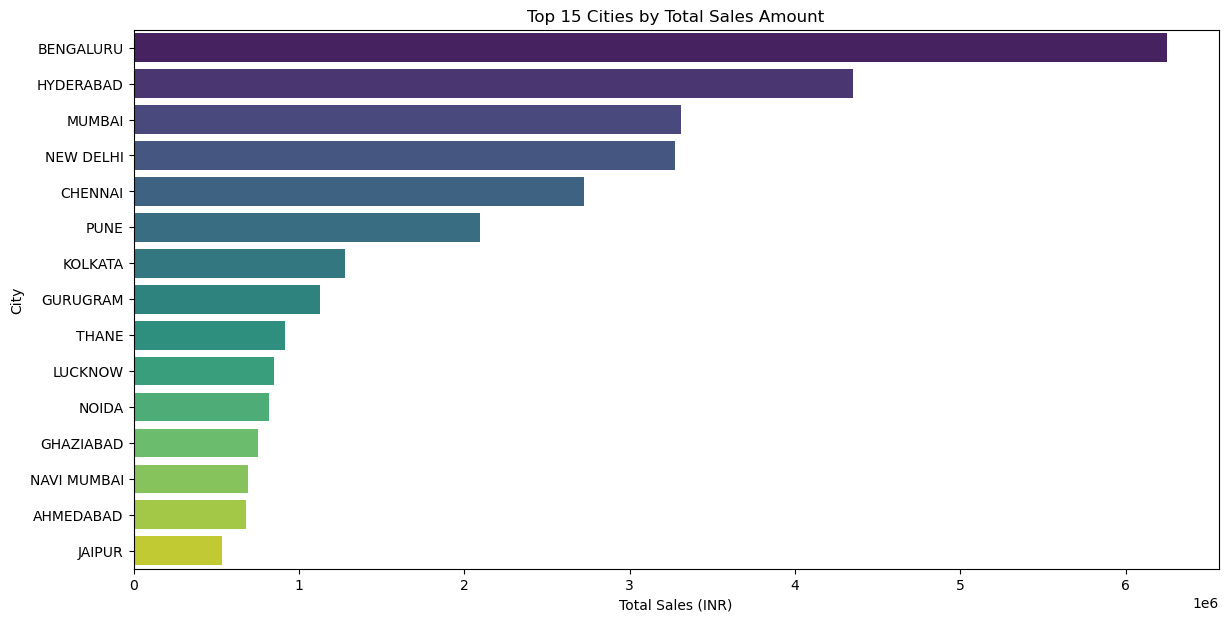

In [30]:
city_sales = df.groupby("ship-city")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,7))
sns.barplot(
    x=city_sales.head(15).values,
    y=city_sales.head(15).index,
    palette="viridis"
)
plt.title("Top 15 Cities by Total Sales Amount")
plt.xlabel("Total Sales (INR)")
plt.ylabel("City")
plt.show()


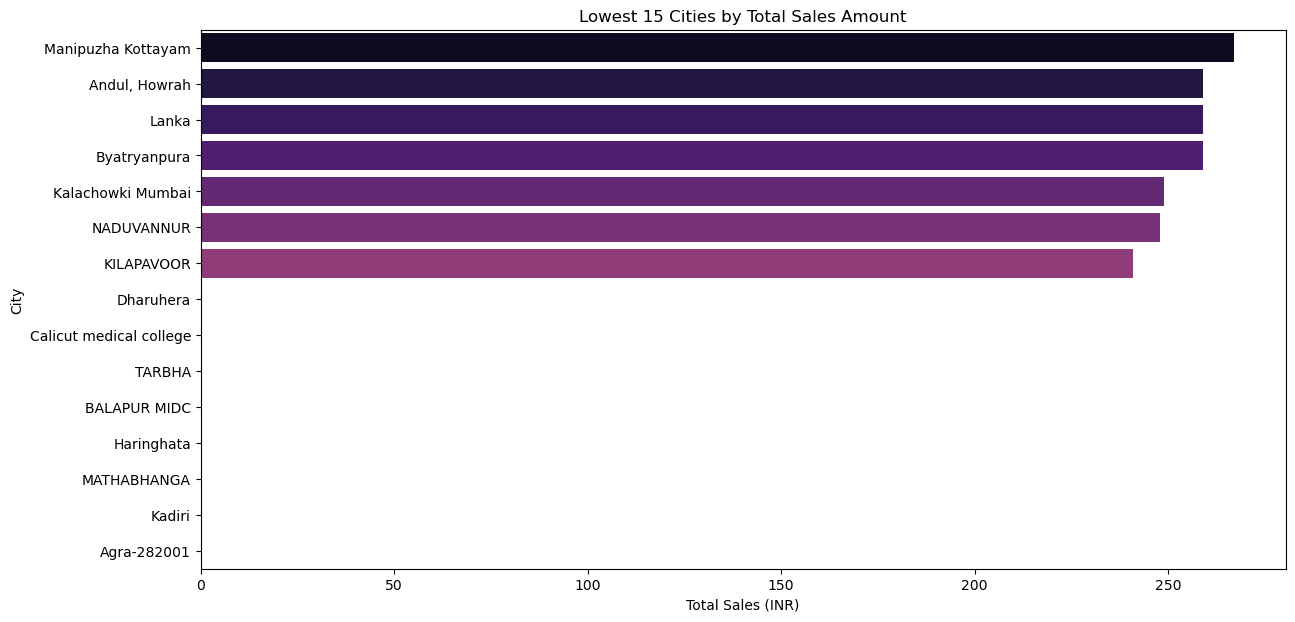

In [31]:
plt.figure(figsize=(14,7))
sns.barplot(
    x=city_sales.tail(15).values,
    y=city_sales.tail(15).index,
    palette="magma"
)
plt.title("Lowest 15 Cities by Total Sales Amount")
plt.xlabel("Total Sales (INR)")
plt.ylabel("City")
plt.show()


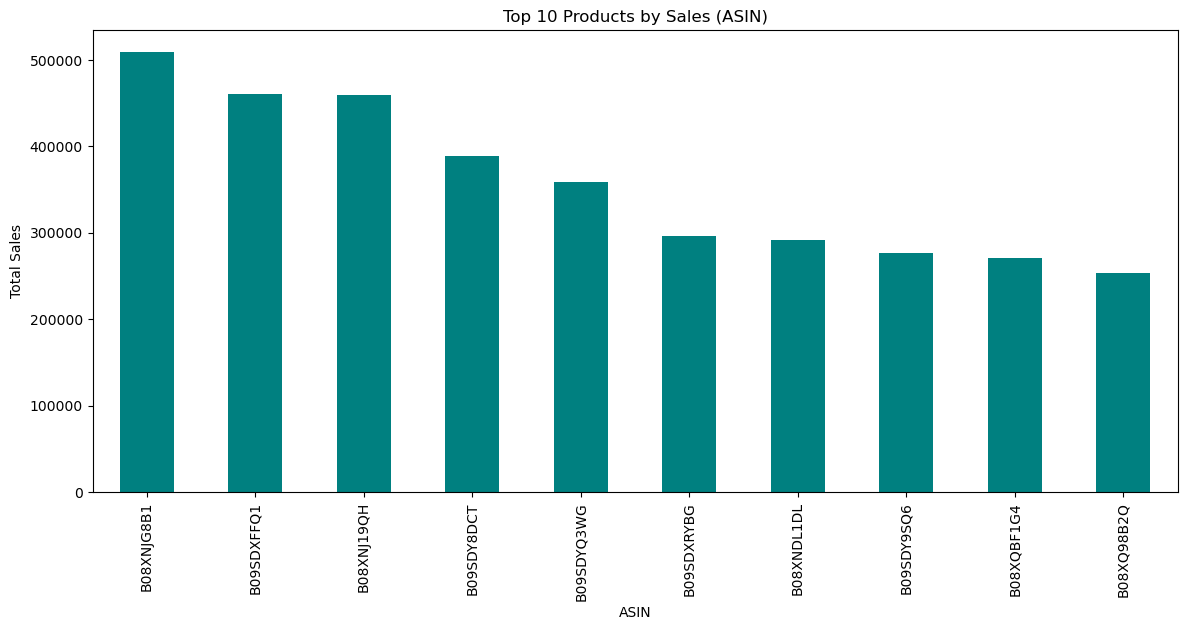

In [32]:
asin_sales = df.groupby("ASIN")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
asin_sales.head(10).plot(kind="bar", color="teal")
plt.title("Top 10 Products by Sales (ASIN)")
plt.ylabel("Total Sales")
plt.xlabel("ASIN")
plt.show()


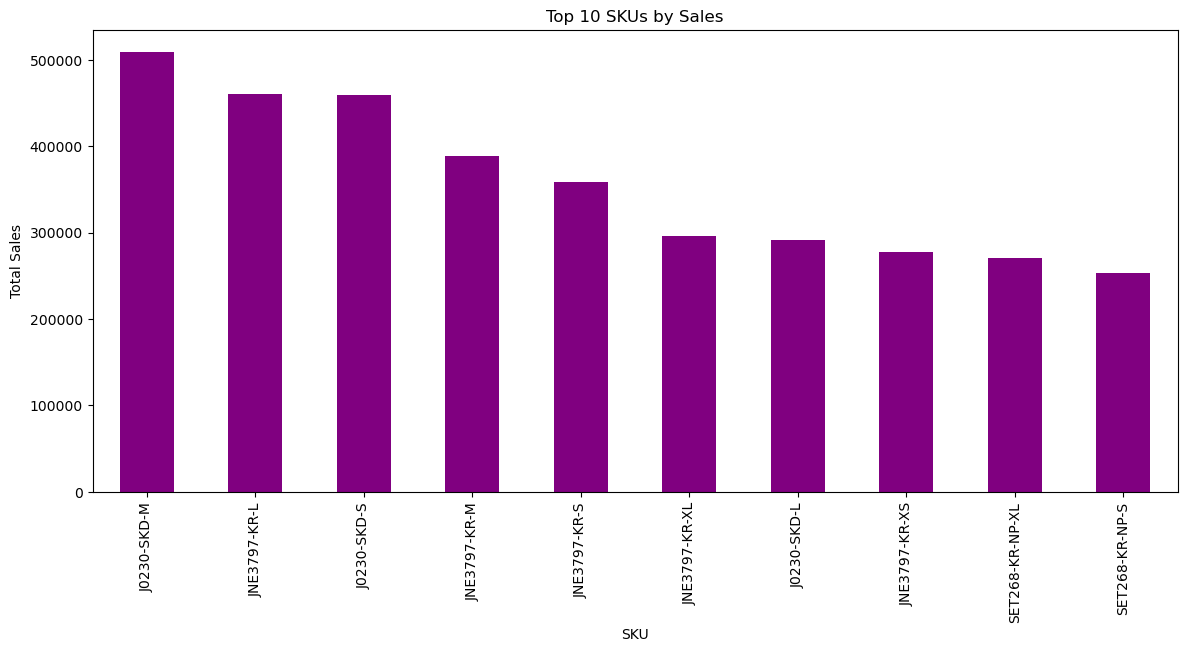

In [33]:
sku_sales = df.groupby("SKU")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sku_sales.head(10).plot(kind="bar", color="purple")
plt.title("Top 10 SKUs by Sales")
plt.ylabel("Total Sales")
plt.xlabel("SKU")
plt.show()


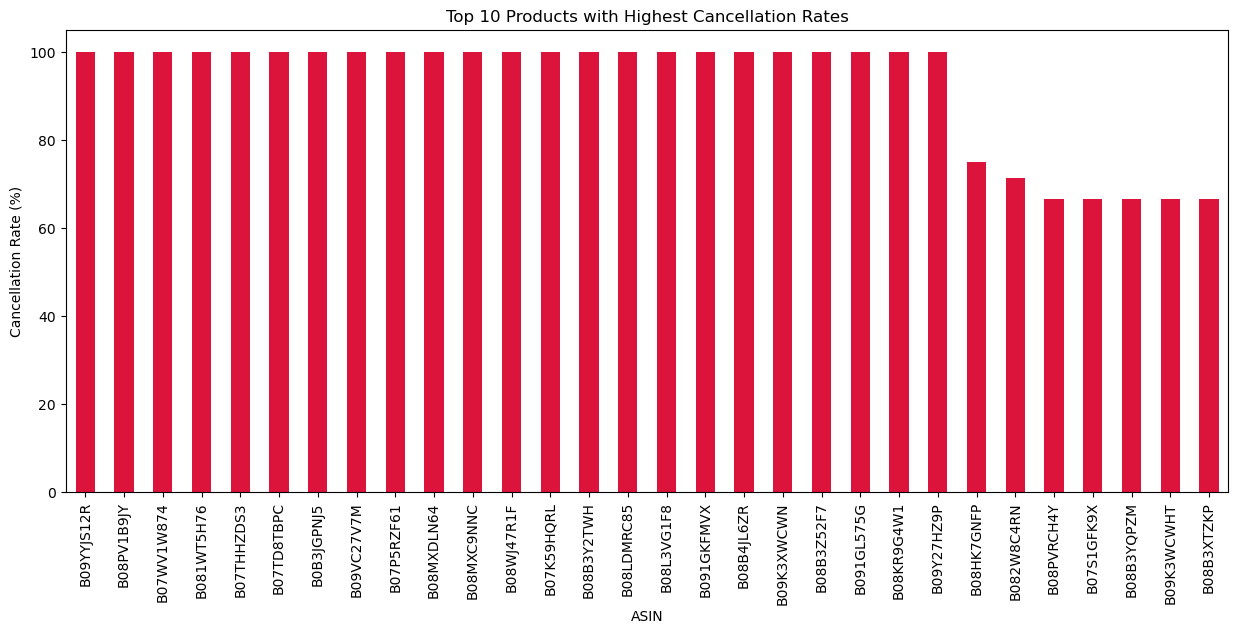

In [34]:
cancel_rate_asin = df.groupby("ASIN")["is_cancelled"].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(15,6))
cancel_rate_asin.head(30).plot(kind="bar", color="crimson")
plt.title("Top 10 Products with Highest Cancellation Rates")
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("ASIN")
plt.show()


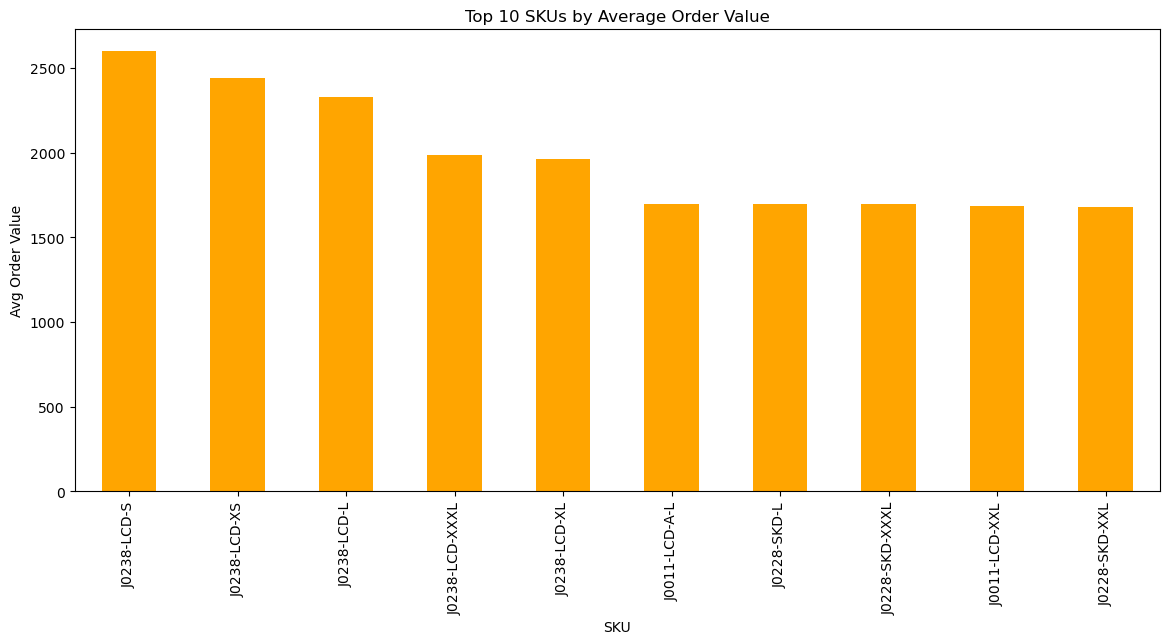

In [35]:
avg_sku_value = df.groupby("SKU")["Amount"].mean().sort_values(ascending=False)

plt.figure(figsize=(14,6))
avg_sku_value.head(10).plot(kind="bar", color="orange")
plt.title("Top 10 SKUs by Average Order Value")
plt.ylabel("Avg Order Value")
plt.xlabel("SKU")
plt.show()


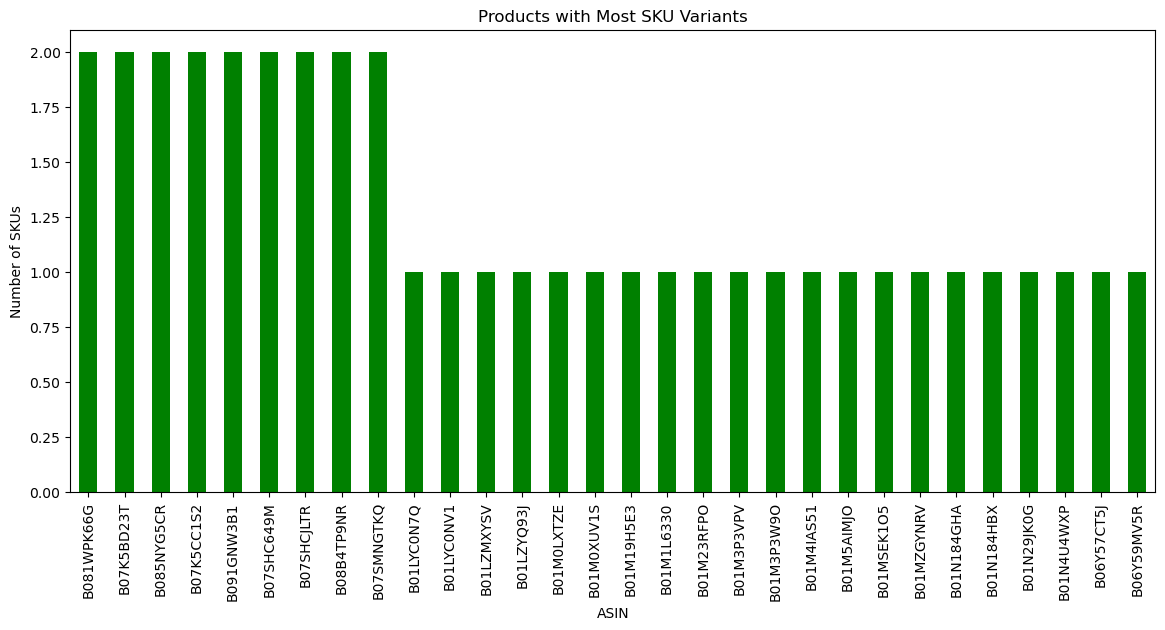

In [36]:
asin_sku_count = df.groupby("ASIN")["SKU"].nunique().sort_values(ascending=False)

plt.figure(figsize=(14,6))
asin_sku_count.head(30).plot(kind="bar", color="green")
plt.title("Products with Most SKU Variants")
plt.ylabel("Number of SKUs")
plt.xlabel("ASIN")
plt.show()


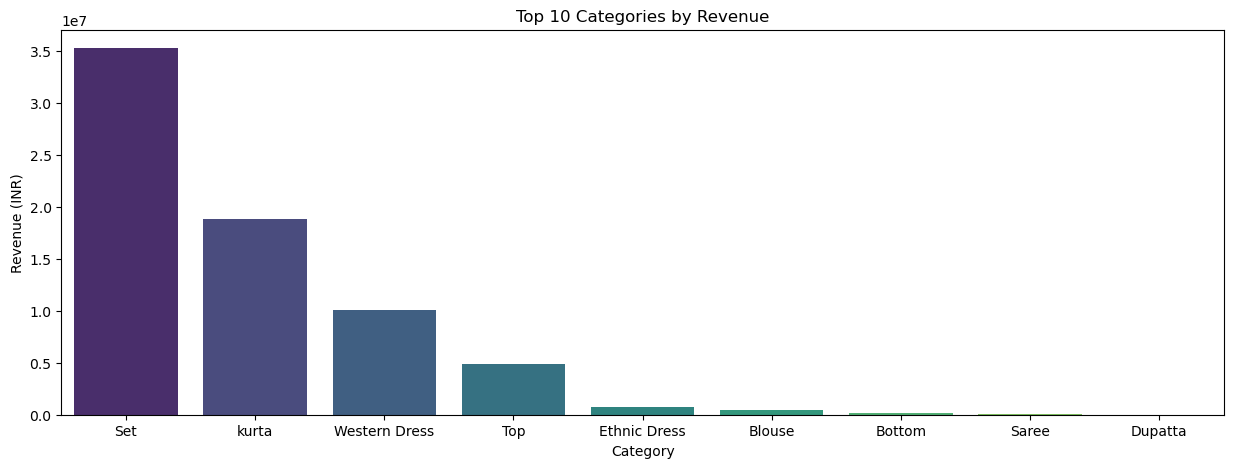

In [37]:
category_sales = df.groupby("Category")["Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.xticks(rotation=0)
plt.title("Top 10 Categories by Revenue")
plt.ylabel("Revenue (INR)")
plt.show()

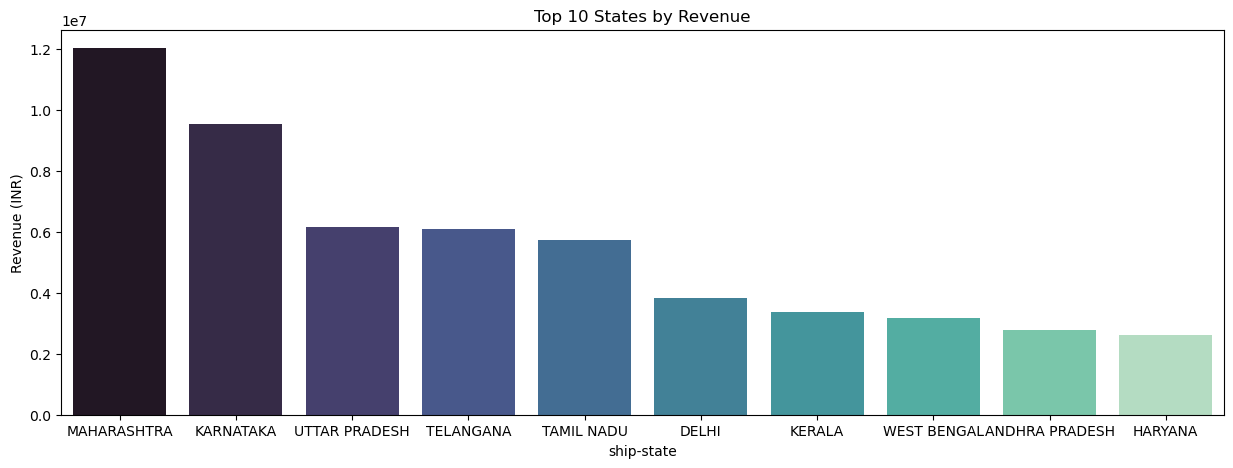

In [38]:
state_sales = df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(x=state_sales.index, y=state_sales.values, palette="mako")
plt.xticks(rotation=0)
plt.title("Top 10 States by Revenue")
plt.ylabel("Revenue (INR)")
plt.show()


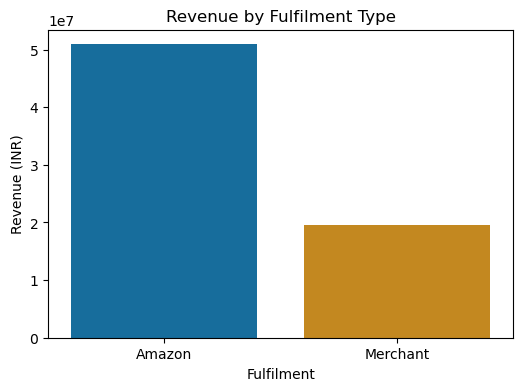

In [39]:
fulfilment_sales = df.groupby("Fulfilment")["Amount"].sum()

plt.figure(figsize=(6,4))
sns.barplot(x=fulfilment_sales.index, y=fulfilment_sales.values, palette="colorblind")
plt.title("Revenue by Fulfilment Type")
plt.ylabel("Revenue (INR)")
plt.show()


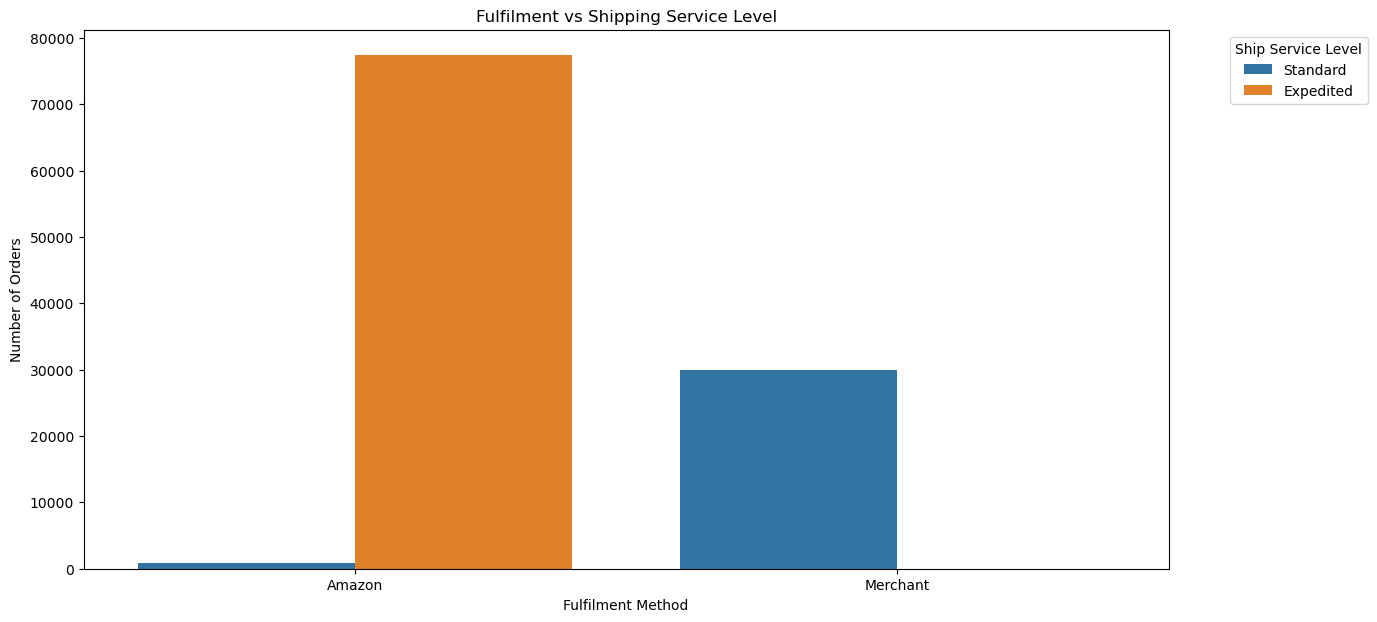

In [40]:
plt.figure(figsize=(14,7))
sns.countplot(
    data=df,
    x="Fulfilment",
    hue="ship-service-level",
    order=df["Fulfilment"].value_counts().index
)
plt.title("Fulfilment vs Shipping Service Level")
plt.xlabel("Fulfilment Method")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Service Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

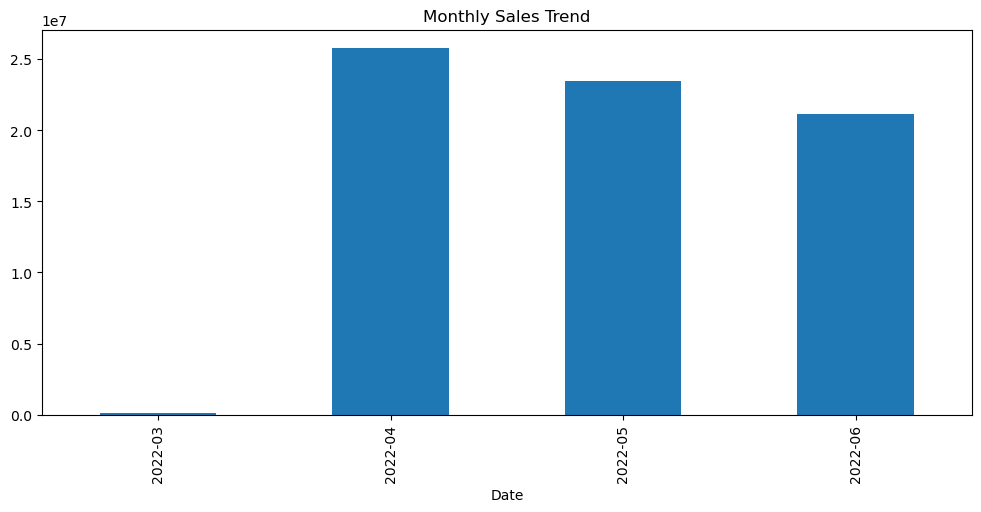

In [43]:
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Amount"].sum() 
monthly_sales.plot(kind="bar", figsize=(12,5), title="Monthly Sales Trend")

<Axes: title={'center': 'Sales with vs without Promotion'}, xlabel='promotion-ids'>

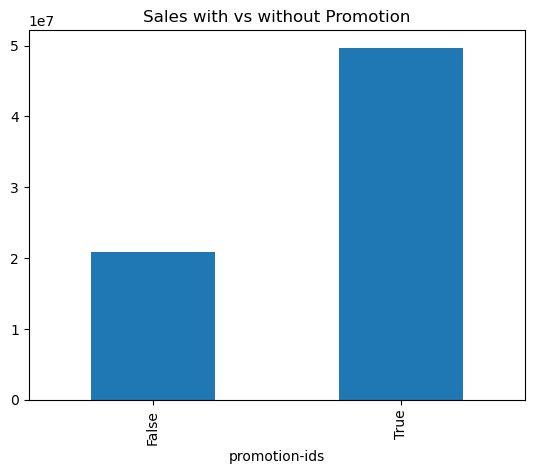

In [44]:
promo_sales = df.groupby(df["promotion-ids"].ne("No Promotion"))["Amount"].sum()
promo_sales.plot(kind="bar", title="Sales with vs without Promotion") #Compare sales with vs without promotion-ids.

In [45]:
cancellation_rate = df["Status"].value_counts(normalize=True) * 100
print(cancellation_rate)


Status
Shipped                          67.145404
Delivered                        24.530114
Cancelled                         4.824006
Shipped - Returned to Seller      1.706828
Shipped - Picked Up               0.847872
Pending                           0.539387
Pending - Waiting for Pick Up     0.241985
Shipped - Returning to Seller     0.120069
Shipped - Out for Delivery        0.029555
Shipped - Rejected by Buyer       0.010160
Shipped - Lost in Transit         0.003694
Shipped - Damaged                 0.000924
Name: proportion, dtype: float64


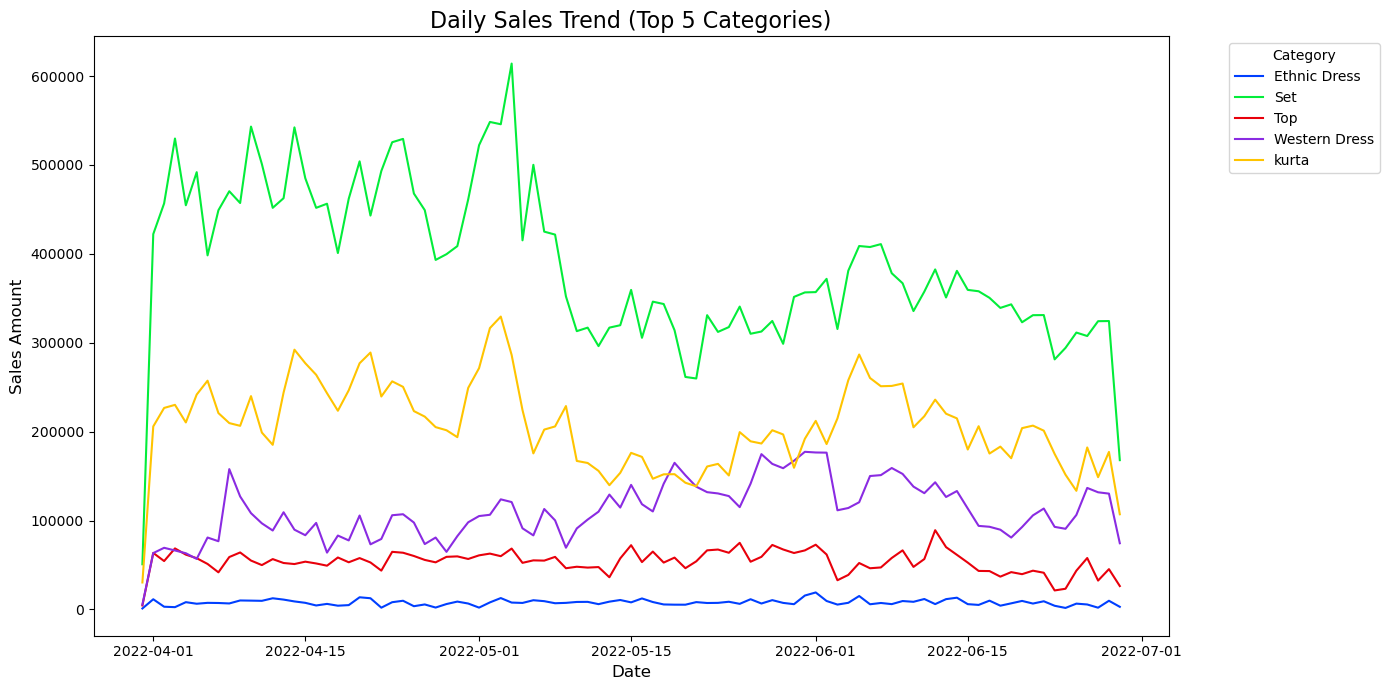

In [67]:
# Find top 5 categories by total sales
top_categories = df.groupby("Category")["Amount"].sum().nlargest(5).index

# Filter data for only those categories
daily_top = df[df["Category"].isin(top_categories)]
daily_trends = daily_top.groupby([df["Date"].dt.date, "Category"])["Amount"].sum().unstack().fillna(0)

# Plot
daily_trends.plot(figsize=(14,7))
plt.title("Daily Sales Trend (Top 5 Categories)", fontsize=16)
plt.ylabel("Sales Amount", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


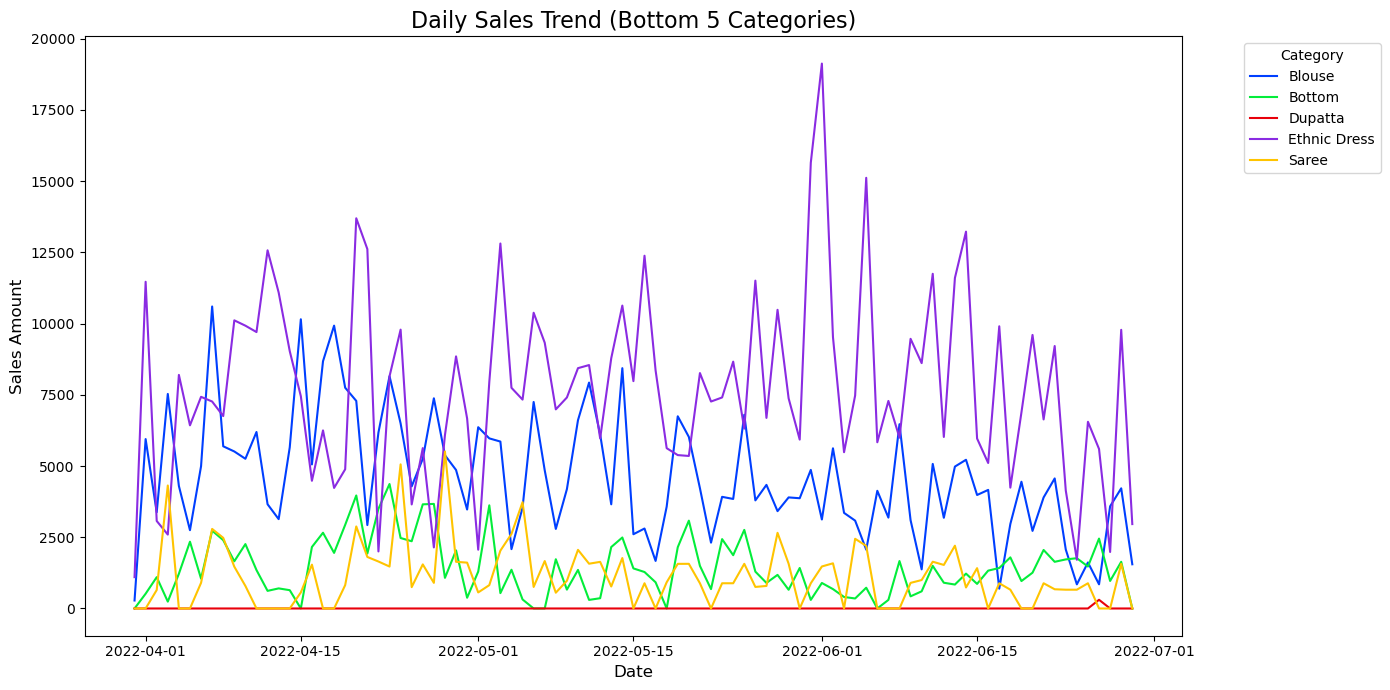

In [68]:
bottom_categories = df.groupby("Category")["Amount"].sum().nsmallest(5).index
daily_bottom = df[df["Category"].isin(bottom_categories)]
daily_bottom_trends = daily_bottom.groupby([df["Date"].dt.date, "Category"])["Amount"].sum().unstack().fillna(0)

daily_bottom_trends.plot(figsize=(14,7))
plt.title("Daily Sales Trend (Bottom 5 Categories)", fontsize=16)
plt.ylabel("Sales Amount", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 🏁 Conclusion

##  Main Goal
- Analyze the cancellation rate and identify the cities/states with high cancellation levels.

---
- **Sales Trends**
  - Sales were strong at the beginning of the dataset but showed a noticeable drop toward the end.
  - The **Dupatta** category had almost **zero sales for most of the time** except a small rise in the last month.

- **Cancellations**
  - There are **23 products with a 100% cancellation rate** .
  - Certain **cities with zero actual sales** were linked with these cancellations, including:  
    *Dharuhera, Calicut Medical College, TARBHA, BALAPUR MIDC, Haringhata, MATHABHANGA, Kadiri, Agra-282001*.

- **Fulfilment & Shipping**
  - Merchant fulfilment is strongly tied to **Standard shipping**, while Amazon often uses **Expedited shipping**.
  - Some fulfilment methods and categories show **higher cancellation rates**, suggesting logistics or stock problems.

---

## Recommendations
- Investigate the **23 cancelled products** → review stock quality, shipping methods, or listing errors.
- Reconsider investment in weak categories like **Dupatta**:
  - Option 1: Increase marketing/discounts.  
  - Option 2: Discontinue if demand is structurally low.
- Focus on **cities with repeated cancellations** → coordinate with courier partners to improve reliability.
- Encourage sellers to use **Amazon fulfilment (FBA)** for critical categories → fewer cancellations compared to Merchant fulfilment.

---

##  Limitations
- Dataset covers only **April–May 2022 (~2 months)** → may not reflect long-term seasonal trends.
- Some categories had **very low sales**, exaggerating cancellation percentages.
- External influences (festivals, courier strikes, supply shortages) are **not included** in the dataset.

---

## Final Note
The analysis revealed **strong initial sales** but a **decline at the end**, with a clear issue in **cancellations for specific products and cities**.  
By addressing **weak categories**, **improving fulfilment strategy**, and **fixing delivery issues in problem regions**, Amazon sellers can **reduce cancellations, boost revenue, and improve customer satisfaction**.

